In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.6 MB/s eta 0:00:00


In [2]:
#Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
#Define the number of locations and vehicles
num_locations = 20
locations = [(random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)] # Create a list of tuples representing location coordinates -
depot = (50,50) # Define the coordinates for the depot
num_vehicles = 3

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
#Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [7]:
# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) #indpb:Independent probability for each attribute to be flipped.
toolbox.register("select", tools.selTournament, tournsize=3)

In [8]:
#Function to visualize the routes - just plot the points and lines for each vehicle

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	213   	576.07 	4.30416
2  	243   	567.936	5.27116
3  	232   	561.91 	2.77528
4  	233   	553.965	6.55303
5  	218   	549.825	4.08513
6  	213   	538.734	3.87327
7  	233   	538.219	1.09972
8  	219   	527.223	4.05846
9  	209   	514.01 	5.39015
10 	224   	501.167	4.17852
11 	230   	503.805	2.37992
12 	230   	497.622	2.37992
13 	217   	475.683	2.37992
14 	231   	461.688	3.48565
15 	250   	452.761	3.48565
16 	238   	443.887	3.2566 
17 	236   	436.783	2.76198
18 	225   	433.678	2.85994
19 	225   	422.033	5.29744
20 	209   	407.835	4.48927
21 	232   	400.929	4.65566
22 	237   	391.818	3.26045
23 	217   	388.535	3.53801
24 	227   	382.08 	0.94264
25 	246   	379.186	4.36411
26 	233   	371.863	7.11318
27 	219   	368.733	8.88251
28 	229   	366.291	4.98234
29 	223   	360.569	10.0775
30 	238   	357.092	10.8549
31 	225   	351.222	10.8683
32 	221   	349.07 	8.29349
33 	243   	342.582	8.9172 
34 	232   	343.995	11.18  
35 	244   	345.283	8.28692
3

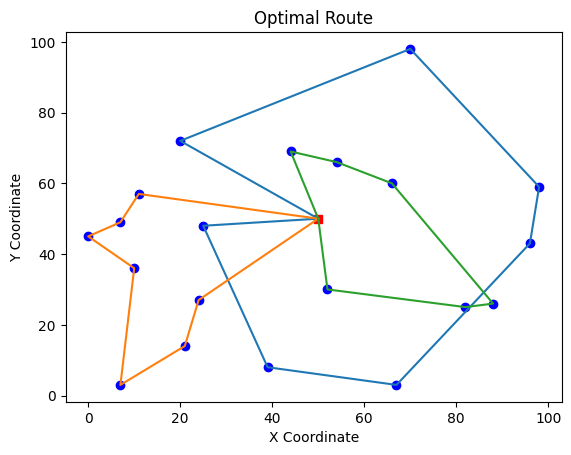

In [9]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.

gen	nevals	avg    	min   
0  	100   	593.084	6.6114
1  	75    	574.634	5.87099
2  	84    	569.63 	6.56137
3  	81    	560.994	3.92568
4  	86    	560.474	7.31352
5  	86    	548.814	4.97766
6  	80    	543.675	7.17185
7  	70    	535.678	3.70017
8  	70    	532.51 	12.0869
9  	86    	543.685	7.74047
10 	71    	526.877	6.96721
11 	77    	522.828	3.60774
12 	76    	498.884	3.13366
13 	79    	478.092	13.628 
14 	71    	460.781	5.04413
15 	76    	444.362	7.18946
16 	74    	441.208	6.72059
17 	74    	431.739	11.0214
18 	85    	422.802	7.07762
19 	80    	422.776	7.07762
20 	73    	409.965	1.92051
21 	84    	403.065	1.1188 
22 	80    	396.639	0.148018
23 	77    	384.08 	1.1188  
24 	82    	381.988	1.1188  
25 	76    	372.185	1.1188  
26 	87    	363.97 	1.1188  
27 	64    	355.244	1.1188  
28 	82    	345.616	1.1188  
29 	77    	338.9  	6.66617 
30 	80    	330.157	6.66617 
31 	84    	330.019	6.36044 
32 	67    	326.724	4.05854 
33 	68    	320.129	3.10059 
34 	78    	315.954	6.66617 
35 	83    	319.48

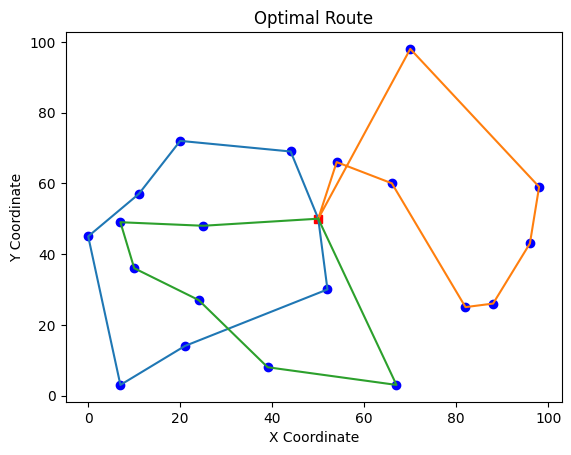

In [10]:
#Parameter Tuning
#Varying population size i.e., DECREASING THE POPULATION SIZE

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=100)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 100, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()


gen	nevals	avg    	min    
0  	1000  	596.529	3.10338
1  	767   	573.262	1.52391
2  	736   	559.514	3.72769
3  	744   	549.972	0.474832
4  	764   	548.689	0.534045
5  	789   	542.438	2.93125 
6  	771   	541.472	0.539996
7  	771   	538.811	0.539996
8  	741   	535.475	0.539996
9  	776   	539.474	0.635619
10 	766   	531.995	1.69565 
11 	743   	526.947	1.22483 
12 	759   	527.024	1.08174 
13 	754   	523.794	0.750831
14 	745   	523.561	1.50206 
15 	749   	521.913	1.64242 
16 	773   	516.149	1.85131 
17 	742   	511.948	1.85131 
18 	788   	511.464	3.19085 
19 	759   	502.98 	4.73337 
20 	779   	502.693	1.02693 
21 	739   	497.72 	2.07303 
22 	764   	490.675	0.965766
23 	751   	487.466	1.13937 
24 	732   	480.263	3.15607 
25 	765   	477.352	0.724456
26 	773   	473.614	1.93817 
27 	763   	469.551	1.37121 
28 	785   	467.969	0.304255
29 	741   	458.794	2.095   
30 	757   	454.628	0.892709
31 	764   	451.564	0.892709
32 	763   	445.157	1.0195  
33 	752   	439.431	1.09666 
34 	723   	428.856	1.096

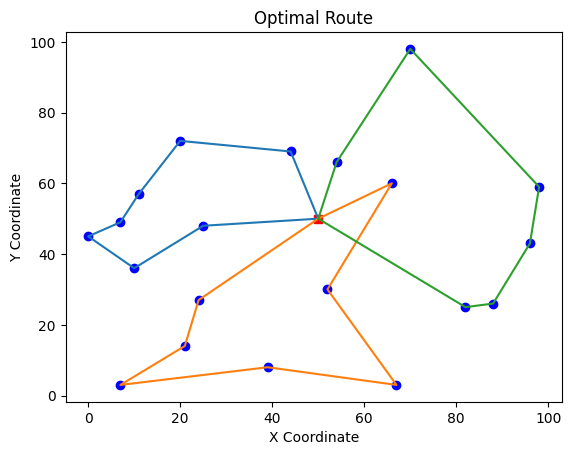

In [11]:
#Parameter Tuning
#Varying population size i.e., INCREASING THE POPULATION SIZE

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=1000)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 1000, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

Parameter tuning, particularly of population size, plays a crucial role in the performance and outcomes of genetic algorithms (GAs), including in applications like solving the vehicle routing problem (VRP). Here's how it impacts the results:

### 1. **Exploration vs. Exploitation Balance:**
   - **Large Population Size:** A larger population size increases diversity among solutions, promoting better exploration of the solution space. This can help in avoiding local optima and finding a more globally optimal solution. However, it also increases computational costs and can slow down convergence.
   - **Small Population Size:** A smaller population size reduces diversity, which can lead to faster convergence but at the risk of getting trapped in local optima. This can be effective if the search space is well-understood or relatively simple.

### 2. **Convergence Speed:**
   - **Impact on Speed:** A larger population may slow down the convergence because the algorithm needs to evaluate more individuals per generation. Conversely, a smaller population tends to converge faster but might miss the optimal solution due to reduced genetic diversity.
   - **Premature Convergence:** If the population size is too small, the algorithm might converge prematurely to suboptimal solutions, especially in complex problems like VRP.

### 3. **Solution Quality:**
   - **Higher Quality Solutions:** Larger populations generally lead to higher-quality solutions because they explore more of the solution space. This is particularly important in VRP, where the search space is vast and complex.
   - **Risk of Stagnation:** A very large population might require many generations to show improvement, leading to stagnation if the evolutionary pressure is insufficient.

### 4. **Computational Cost:**
   - **Efficiency Considerations:** A larger population size increases the computational burden per generation, requiring more time and resources. For complex problems like VRP, this trade-off between quality and computational cost must be carefully managed.
   - **Resource Constraints:** If computational resources are limited, a balance must be struck to ensure that the population size is large enough to maintain diversity without overwhelming the system.

### 5. **Impact on Mutation and Crossover:**
   - **Genetic Diversity:** In a larger population, the effects of mutation and crossover are more pronounced, as there is a broader range of genetic material to combine. This can lead to more innovative solutions in the VRP.
   - **Reduced Effectiveness:** In a smaller population, mutation and crossover may not introduce enough diversity, leading to homogeneous populations that evolve less effectively.

### Practical Considerations in VRP:
- **Test and Tune:** Given the complexity of VRP, it's often necessary to experiment with different population sizes to find the optimal balance. This may involve running the algorithm multiple times with different parameters and observing the trade-offs between solution quality and computational cost.
- **Adaptive Strategies:** Some implementations allow the population size to adapt dynamically based on the convergence rate or diversity measures, which can be particularly effective in complex problems like VRP.

Tuning the population size is a key step in optimizing genetic algorithms, directly influencing the quality of the solutions and the efficiency of the algorithm, especially in complex problems like the vehicle routing problem.

gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	265   	574.944	4.30416
2  	275   	566.748	0.0554646
3  	271   	560.977	3.91766  
4  	270   	553.922	3.36178  
5  	266   	559.715	3.16969  
6  	273   	552.455	2.14639  
7  	279   	547.501	1.20017  
8  	263   	546.712	1.20017  
9  	267   	544.38 	5.06444  
10 	265   	537.369	2.28058  
11 	282   	539.371	2.97525  
12 	277   	538.307	0.864169 
13 	272   	535.054	3.65179  
14 	278   	539.944	3.1196   
15 	285   	539.191	2.55761  
16 	274   	539.989	4.95233  
17 	283   	543.275	2.35883  
18 	276   	541.525	1.25599  
19 	277   	538.026	5.16618  
20 	275   	537.383	2.92179  
21 	271   	535.441	3.44904  
22 	276   	532.853	4.75767  
23 	281   	534.461	1.53093  
24 	282   	535.375	3.56721  
25 	266   	527.715	2.73339  
26 	275   	535.169	4.34162  
27 	269   	526.974	3.45599  
28 	279   	524.908	2.50233  
29 	275   	528.429	0.908659 
30 	267   	528.623	0.561345 
31 	270   	535.214	0.561345 
32 	275   	534.585	2.9088   
33 	276   	530.598	6

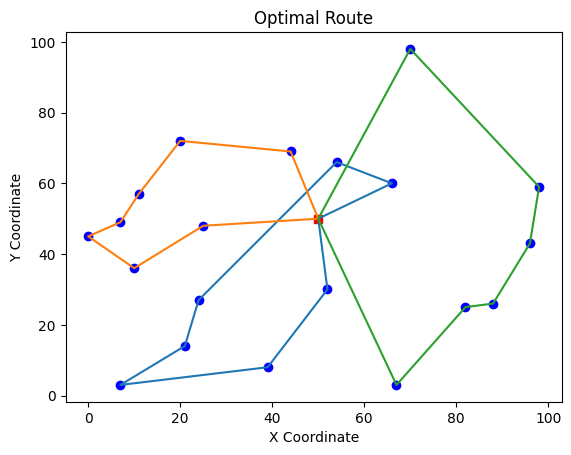

In [12]:
#Varying muation rate INCREASING THE MUTATION RATE

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.7, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()


gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	197   	573.318	4.30416
2  	227   	564.403	1.16279
3  	223   	554.741	1.42381
4  	218   	546.862	4.18122
5  	208   	539.856	0.446161
6  	210   	539.973	2.02885 
7  	209   	532.538	5.18687 
8  	194   	523.49 	4.63463 
9  	217   	520.18 	1.42089 
10 	219   	513.117	2.04938 
11 	200   	499.314	2.63366 
12 	221   	486.899	5.31504 
13 	230   	472.871	2.89679 
14 	218   	446.364	4.26714 
15 	200   	428.336	8.01593 
16 	185   	401.562	10.7707 
17 	216   	389.247	6.76043 
18 	215   	381.542	6.76043 
19 	216   	373.423	6.76043 
20 	204   	363.093	6.76043 
21 	218   	356.687	6.76043 
22 	194   	349.851	8.41843 
23 	213   	345.825	20.6588 
24 	204   	343.702	20.5184 
25 	209   	342.053	13.2987 
26 	198   	338.502	15.1505 
27 	213   	336.089	18.6222 
28 	220   	333.963	16.318  
29 	211   	332.496	16.318  
30 	197   	331.248	16.318  
31 	224   	329.041	16.318  
32 	213   	325.564	16.318  
33 	206   	324.478	7.69835 
34 	213   	325.908	16.318 

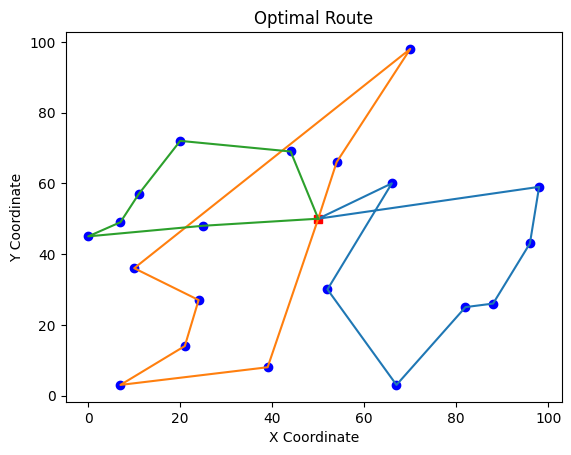

In [13]:
#Varying mutation rate DECREASING THE MUTATION RATE

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.01, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()


Varying the mutation rate in a genetic algorithm (GA) also plays a significant role in determining the effectiveness and efficiency of the search process, particularly in solving complex problems like the vehicle routing problem (VRP). Here's how changing the mutation rate affects outcomes:

### 1. **Genetic Diversity:**
   - **High Mutation Rate:** A higher mutation rate introduces more randomness into the population, increasing genetic diversity. This helps the algorithm explore a broader range of solutions, which can be beneficial in avoiding local optima. However, too much mutation can disrupt the inheritance of good traits, making the search more random and less directed.
   - **Low Mutation Rate:** A lower mutation rate means that offspring are more similar to their parents, preserving the current genetic makeup. This can help the algorithm focus on refining existing solutions, but it may lead to premature convergence, where the population becomes too homogeneous and gets stuck in suboptimal solutions.

### 2. **Exploration vs. Exploitation:**
   - **High Mutation Rate:** Encourages exploration by introducing new genetic material into the population, which can lead to discovering new and potentially better solutions. In VRP, this can help in finding more efficient routes that might be missed by a less explorative approach.
   - **Low Mutation Rate:** Promotes exploitation of the current solution space, refining and optimizing within a narrower range. This is useful when the algorithm is close to an optimal solution but can be limiting if the population lacks diversity.

### 3. **Convergence Behavior:**
   - **Fast Convergence with Low Mutation:** With a lower mutation rate, the algorithm may converge faster because it refines existing solutions rather than exploring new ones. However, this can lead to suboptimal solutions if the population has not adequately explored the solution space.
   - **Slow Convergence with High Mutation:** A high mutation rate can slow down convergence because it constantly introduces new variations, preventing the population from settling too quickly on a single solution. This can be advantageous in maintaining diversity but may require more generations to achieve an optimal solution.

### 4. **Balancing Mutation Rate:**
   - **Too High Mutation Rate:** If the mutation rate is too high, the GA might lose the ability to effectively exploit good solutions, as beneficial traits can be frequently lost. This can lead to a random search rather than a guided evolution towards optimal solutions.
   - **Too Low Mutation Rate:** On the other hand, if the mutation rate is too low, the GA might fail to introduce necessary diversity, leading to stagnation in suboptimal solutions. This is especially problematic in VRP, where the solution space is large and complex.

### 5. **Impact on Problem Complexity:**
   - **Complex Problems like VRP:** In VRP, where the search space is vast and multi-modal, an appropriately tuned mutation rate is crucial. A balance needs to be struck to ensure that the algorithm does not converge prematurely while still effectively searching for high-quality solutions.
   - **Adaptive Mutation Rates:** Some GAs use adaptive strategies where the mutation rate changes over time, typically starting higher to promote exploration and gradually decreasing to allow for exploitation. This approach can be particularly effective in VRP.

### 6. **Noise and Robustness:**
   - **Increased Robustness:** A higher mutation rate can help the GA be more robust to noise in the fitness landscape, as it prevents the population from being overly sensitive to small perturbations in the fitness function. This can be beneficial in real-world applications like VRP, where the problem may be noisy or dynamic.
   - **Risk of Over-Mutation:** Too much mutation can create noise within the algorithm itself, leading to less stable solutions and making it difficult for the GA to converge on a good solution.

### Practical Considerations in VRP:
- **Testing and Tuning:** As with population size, it’s often necessary to experiment with different mutation rates to find the optimal setting. This might involve running the GA multiple times with varying mutation rates and observing how it affects the quality of the solutions and the convergence behavior.
- **Dynamic Mutation Rates:** Implementing a dynamic mutation rate that adjusts based on the progress of the GA can be particularly effective in solving VRP. For example, starting with a high mutation rate to explore the solution space and then gradually lowering it to fine-tune the best solutions.

Varying the mutation rate in a genetic algorithm is crucial for maintaining a balance between exploration and exploitation. It directly affects the algorithm's ability to discover new solutions and refine existing ones, which is essential for finding optimal or near-optimal solutions in complex problems like the vehicle routing problem.

In [14]:
# VARYING THE TOURNAMENT SIZE
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=10)

In [15]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	225   	560.636	1.62268
2  	220   	535.893	5.44375
3  	218   	520.387	5.8895 
4  	245   	513.09 	4.31901
5  	224   	483.662	4.82263
6  	217   	472.703	6.20617
7  	227   	454.486	5.26446
8  	210   	434.65 	1.34015
9  	233   	400.967	16.0816
10 	242   	402.047	1.20922
11 	229   	377.456	15.0559
12 	231   	373.085	23.1598
13 	235   	361.284	5.75324
14 	232   	361.129	2.46027
15 	222   	361.429	19.0051
16 	218   	359.288	29.2926
17 	240   	357.231	10.3025
18 	240   	356.024	16.9423
19 	226   	360.15 	10.7286
20 	234   	361.947	6.00379
21 	240   	344.33 	8.86255
22 	224   	344.51 	10.8483
23 	233   	349.299	16.9429
24 	216   	347.195	9.71035
25 	228   	347.281	8.23145
26 	202   	340.978	5.90161
27 	235   	340.638	11.7053
28 	217   	338.501	12.9282
29 	220   	333.109	6.20059
30 	237   	319.771	2.86263
31 	202   	318.959	8.79516
32 	227   	313.027	10.6589
33 	229   	311.08 	10.669 
34 	223   	307.304	7.73973
35 	236   	309.394	7.95385
3

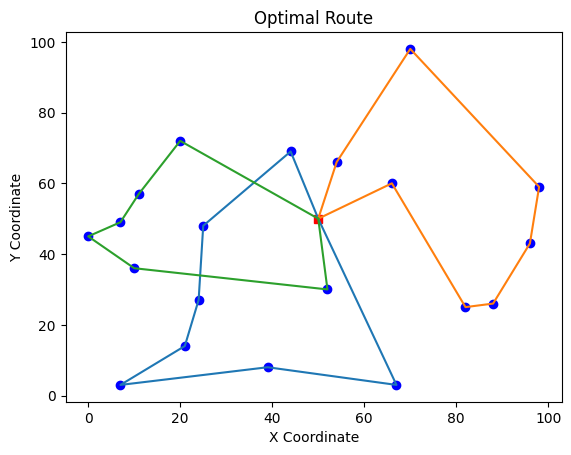

In [17]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [18]:
# VARYING THE TOURNAMENT  SIZE
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=100)

In [19]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	245   	536.235	6.05562
2  	234   	502.801	5.95972
3  	233   	436.974	3.49144
4  	222   	402.05 	4.13747
5  	241   	371.782	0.644218
6  	215   	331.258	7.00514 
7  	236   	336.328	7.79779 
8  	227   	335.796	6.9834  
9  	220   	333.931	6.22848 
10 	211   	335.844	5.30319 
11 	239   	335.853	5.6255  
12 	234   	336.102	7.82402 
13 	227   	335.384	7.60681 
14 	235   	332.728	7.58703 
15 	224   	320.66 	5.30478 
16 	227   	327.353	1.18572 
17 	234   	321.788	8.57034 
18 	237   	321.407	3.16304 
19 	236   	321.896	5.44174 
20 	229   	325.455	7.78549 
21 	227   	324.353	8.95961 
22 	220   	317.259	2.68746 
23 	231   	319.538	12.2034 
24 	229   	316.575	12.2034 
25 	219   	314.436	8.83539 
26 	226   	317.228	7.27057 
27 	243   	316.685	3.80083 
28 	230   	312.605	4.04127 
29 	225   	316.463	6.88778 
30 	245   	312.734	3.02324 
31 	241   	309.179	0.87772 
32 	216   	311.814	6.07053 
33 	226   	316.614	10.3007 
34 	237   	313.8  	9.77949

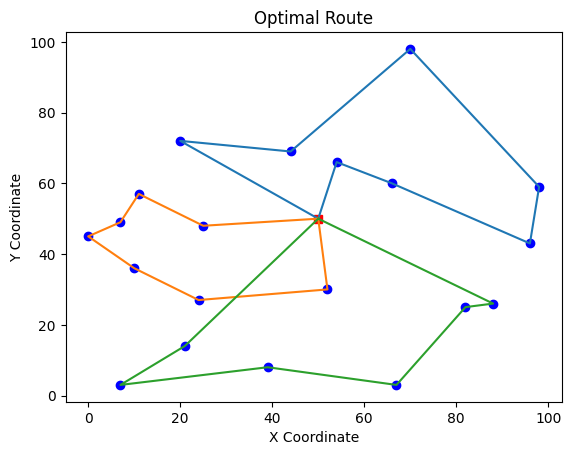

In [20]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [21]:
#Tournament size varying
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [22]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	213   	576.07 	4.30416
2  	243   	567.936	5.27116
3  	232   	561.91 	2.77528
4  	233   	553.965	6.55303
5  	218   	549.825	4.08513
6  	213   	538.734	3.87327
7  	233   	538.219	1.09972
8  	219   	527.223	4.05846
9  	209   	514.01 	5.39015
10 	224   	501.167	4.17852
11 	230   	503.805	2.37992
12 	230   	497.622	2.37992
13 	217   	475.683	2.37992
14 	231   	461.688	3.48565
15 	250   	452.761	3.48565
16 	238   	443.887	3.2566 
17 	236   	436.783	2.76198
18 	225   	433.678	2.85994
19 	225   	422.033	5.29744
20 	209   	407.835	4.48927
21 	232   	400.929	4.65566
22 	237   	391.818	3.26045
23 	217   	388.535	3.53801
24 	227   	382.08 	0.94264
25 	246   	379.186	4.36411
26 	233   	371.863	7.11318
27 	219   	368.733	8.88251
28 	229   	366.291	4.98234
29 	223   	360.569	10.0775
30 	238   	357.092	10.8549
31 	225   	351.222	10.8683
32 	221   	349.07 	8.29349
33 	243   	342.582	8.9172 
34 	232   	343.995	11.18  
35 	244   	345.283	8.28692
3

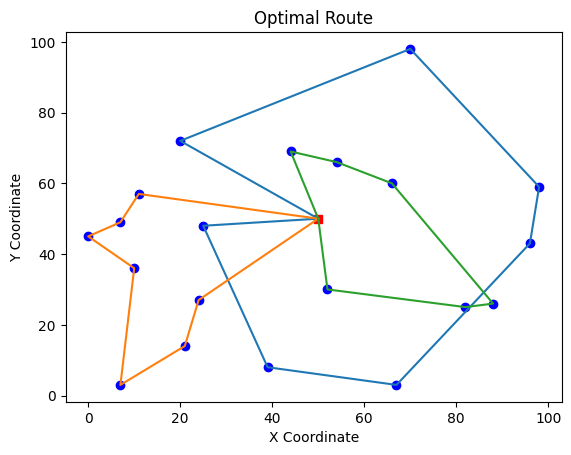

In [23]:
#Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

gen	nevals	avg    	min    
0  	300   	594.757	3.10338
1  	213   	576.07 	4.30416
2  	243   	567.936	5.27116
3  	232   	561.91 	2.77528
4  	233   	553.965	6.55303
5  	218   	549.825	4.08513
6  	213   	538.734	3.87327
7  	233   	538.219	1.09972
8  	219   	527.223	4.05846
9  	209   	514.01 	5.39015
10 	224   	501.167	4.17852
11 	230   	503.805	2.37992
12 	230   	497.622	2.37992
13 	217   	475.683	2.37992
14 	231   	461.688	3.48565
15 	250   	452.761	3.48565
16 	238   	443.887	3.2566 
17 	236   	436.783	2.76198
18 	225   	433.678	2.85994
19 	225   	422.033	5.29744
20 	209   	407.835	4.48927
21 	232   	400.929	4.65566
22 	237   	391.818	3.26045
23 	217   	388.535	3.53801
24 	227   	382.08 	0.94264
25 	246   	379.186	4.36411
26 	233   	371.863	7.11318
27 	219   	368.733	8.88251
28 	229   	366.291	4.98234
29 	223   	360.569	10.0775
30 	238   	357.092	10.8549
31 	225   	351.222	10.8683
32 	221   	349.07 	8.29349
33 	243   	342.582	8.9172 
34 	232   	343.995	11.18  
35 	244   	345.283	8.28692
3

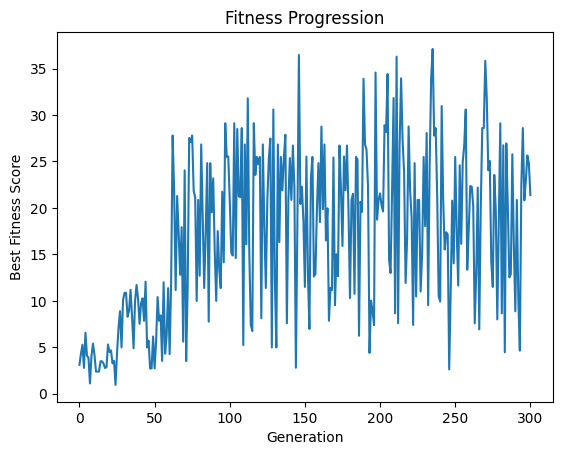

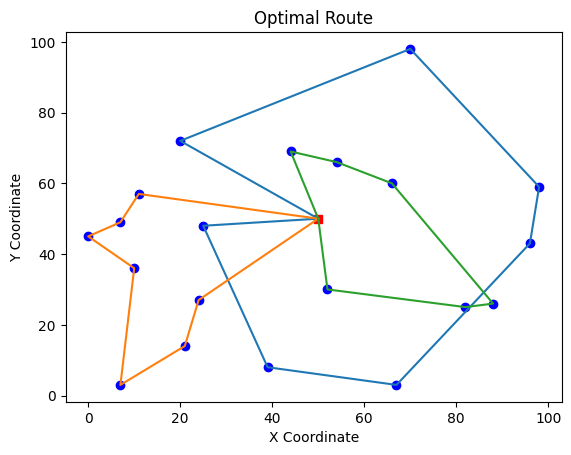

In [24]:
#Plotting fitness score of best indiviuals over generations for above

import matplotlib.pyplot as plt
import numpy as np

def main():
    random.seed(42)
    num_generations = 300
    pop_size = 300

    # Store fitness values for plotting
    fitness_values = []

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, num_generations, stats=stats, halloffame=hof, verbose=True)

    # Extract fitness values from the logbook
    for gen in logbook:
        fitness_values.append(gen["min"])

    # Plot fitness progression
    plt.figure()
    plt.plot(range(num_generations+1), fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.title("Fitness Progression")
    plt.show()

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")

    return pop, stats, hof

if __name__ == "__main__":
    main()



gen	nevals	avg    	min    
0  	1000  	596.529	3.10338
1  	767   	573.262	1.52391
2  	736   	559.514	3.72769
3  	744   	549.972	0.474832
4  	764   	548.689	0.534045
5  	789   	542.438	2.93125 
6  	771   	541.472	0.539996
7  	771   	538.811	0.539996
8  	741   	535.475	0.539996
9  	776   	539.474	0.635619
10 	766   	531.995	1.69565 
11 	743   	526.947	1.22483 
12 	759   	527.024	1.08174 
13 	754   	523.794	0.750831
14 	745   	523.561	1.50206 
15 	749   	521.913	1.64242 
16 	773   	516.149	1.85131 
17 	742   	511.948	1.85131 
18 	788   	511.464	3.19085 
19 	759   	502.98 	4.73337 
20 	779   	502.693	1.02693 
21 	739   	497.72 	2.07303 
22 	764   	490.675	0.965766
23 	751   	487.466	1.13937 
24 	732   	480.263	3.15607 
25 	765   	477.352	0.724456
26 	773   	473.614	1.93817 
27 	763   	469.551	1.37121 
28 	785   	467.969	0.304255
29 	741   	458.794	2.095   
30 	757   	454.628	0.892709
31 	764   	451.564	0.892709
32 	763   	445.157	1.0195  
33 	752   	439.431	1.09666 
34 	723   	428.856	1.096

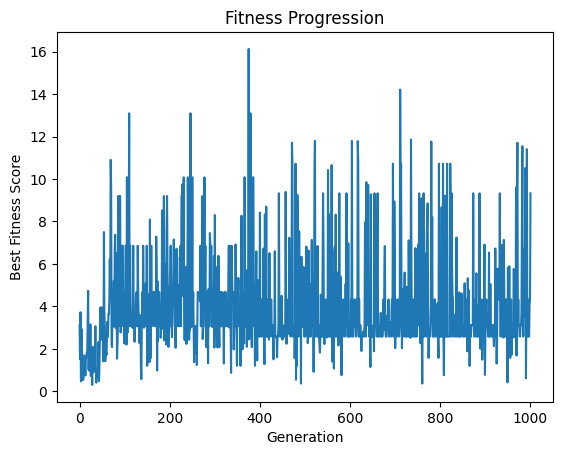

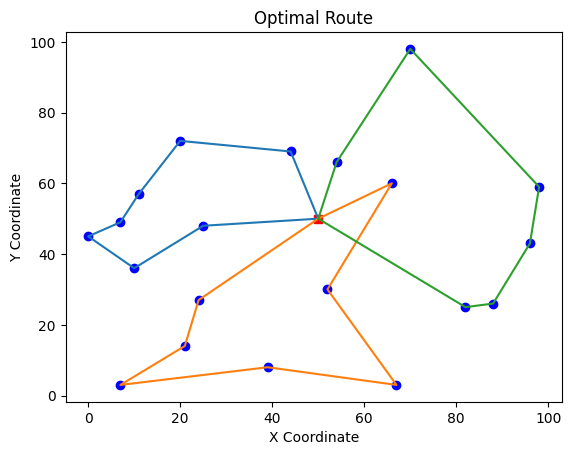

In [25]:
#Plotting fitness score of best indiviuals over generations for above

import matplotlib.pyplot as plt
import numpy as np

def main():
    random.seed(42)
    num_generations = 1000
    pop_size = 1000

    # Store fitness values for plotting
    fitness_values = []

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, num_generations, stats=stats, halloffame=hof, verbose=True)

    # Extract fitness values from the logbook
    for gen in logbook:
        fitness_values.append(gen["min"])

    # Plot fitness progression
    plt.figure()
    plt.plot(range(num_generations+1), fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.title("Fitness Progression")
    plt.show()

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")

    return pop, stats, hof

if __name__ == "__main__":
    main()

The convergence behavior of a genetic algorithm (GA) varies significantly under different configurations, especially in terms of population size, mutation rate, crossover rate, and selection pressure. Here's how these factors influence the convergence process:

### 1. **Population Size:**
   - **Large Population Size:**
     - **Slower Convergence:** A larger population size increases genetic diversity, which helps in exploring a broader solution space. This generally leads to slower convergence because the algorithm needs more time to evaluate and refine a larger set of solutions. The diversity can prevent premature convergence to local optima, but at the cost of requiring more generations to reach an optimal solution.
     - **Higher-Quality Solutions:** The broader search can lead to higher-quality solutions in complex problems like the vehicle routing problem (VRP), where a wide exploration is necessary to identify the best routes.
   - **Small Population Size:**
     - **Faster Convergence:** A smaller population leads to less diversity, causing the algorithm to converge more quickly. However, this can increase the risk of getting stuck in local optima, especially in complex search spaces.
     - **Risk of Premature Convergence:** With less diversity, the population may converge prematurely to a suboptimal solution, particularly if the initial population does not cover a wide range of the solution space.

### 2. **Mutation Rate:**
   - **High Mutation Rate:**
     - **Exploration-Oriented Convergence:** A high mutation rate introduces more randomness, promoting exploration and helping to escape local optima. This can delay convergence because the population is constantly being altered, making it harder for the algorithm to settle on a single solution.
     - **Potential for Divergence:** If the mutation rate is too high, the population may never converge, as the constant introduction of new genetic material prevents the refinement of solutions.
   - **Low Mutation Rate:**
     - **Exploitation-Oriented Convergence:** A low mutation rate results in more stable populations, where offspring are more similar to their parents. This facilitates faster convergence, as the algorithm focuses on refining existing solutions rather than exploring new ones.
     - **Risk of Stagnation:** If the mutation rate is too low, the algorithm may converge prematurely and stagnate, failing to explore enough of the solution space to find the global optimum.

### 3. **Crossover Rate:**
   - **High Crossover Rate:**
     - **Balanced Convergence:** A high crossover rate promotes the combination of genetic material from different individuals, facilitating the creation of high-quality offspring. This can lead to faster convergence, as good solutions are rapidly combined and propagated through the population.
     - **Reduced Exploration:** However, if the crossover rate is too high without sufficient mutation, the algorithm may focus too much on exploiting existing solutions and not enough on exploring new areas of the solution space.
   - **Low Crossover Rate:**
     - **Slower Convergence:** A low crossover rate reduces the generation of new solutions, leading to slower convergence. The algorithm may struggle to combine good traits effectively, especially in complex problems like VRP.
     - **Risk of Homogeneity:** With a low crossover rate, the population might become too homogeneous, limiting the algorithm’s ability to explore diverse solutions and leading to premature convergence.

### 4. **Selection Pressure:**
   - **High Selection Pressure:**
     - **Fast Convergence:** High selection pressure means that better solutions are more likely to be chosen as parents, leading to rapid convergence. This can be effective in quickly finding a good solution but risks converging to a local optimum if the selection is too aggressive.
     - **Reduced Diversity:** Strong selection pressure can reduce genetic diversity, increasing the likelihood of premature convergence. The population may become dominated by a few individuals, which limits exploration.
   - **Low Selection Pressure:**
     - **Slow Convergence:** Low selection pressure allows more genetic diversity to be maintained, leading to slower convergence. This can be beneficial in avoiding local optima, as it keeps a broader range of solutions in play for longer.
     - **Maintained Diversity:** By preserving more diversity, the algorithm can explore more of the solution space, which is particularly useful in complex problems like VRP. However, it may take longer to refine and converge to the optimal solution.

### 5. **Hybrid and Adaptive Configurations:**
   - **Dynamic Mutation and Crossover Rates:**
     - **Adaptive Convergence:** Some GAs use adaptive rates that change during the course of evolution. For example, the mutation rate might start high to promote exploration and then decrease as the population converges. This approach helps in maintaining a balance between exploration and exploitation, leading to more efficient convergence.
   - **Hybrid Selection Strategies:**
     - **Balanced Convergence:** Combining different selection strategies (e.g., tournament selection with roulette wheel selection) can help balance the trade-offs between maintaining diversity and promoting convergence. This can be particularly effective in complex problems like VRP, where different stages of the search might require different levels of exploration and exploitation.

### Practical Example in VRP:
- **Large Population, Low Mutation:** In VRP, starting with a large population and a low mutation rate might lead to a slower, more stable convergence. This configuration might be ideal if the problem space is well-understood, and you want to avoid random fluctuations.
- **Small Population, High Mutation:** Conversely, a smaller population with a higher mutation rate might be used to rapidly explore the solution space, with the risk of needing more runs to find a good solution.

In summary, the convergence behavior in genetic algorithms is highly sensitive to the configuration of parameters. Balancing these parameters is key to achieving an efficient and effective search process, especially in complex optimization problems like the vehicle routing problem. Each configuration impacts the balance between exploration (searching new areas) and exploitation (refining known good areas), which in turn affects how quickly and effectively the algorithm converges to an optimal solution.

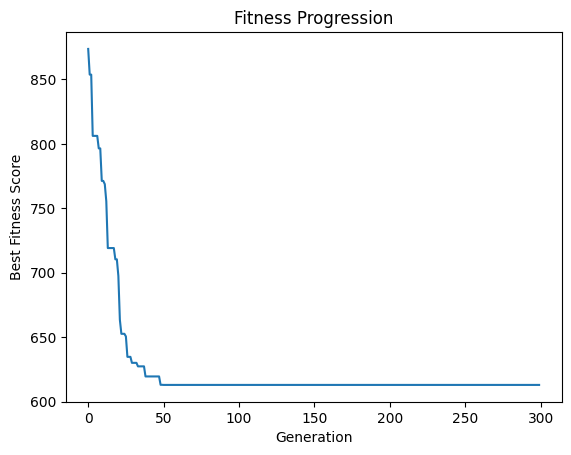

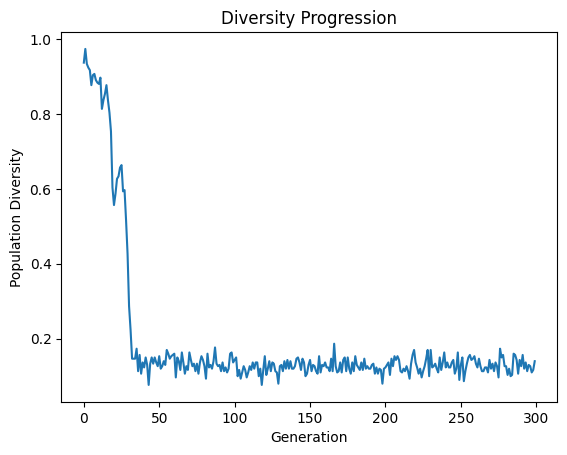

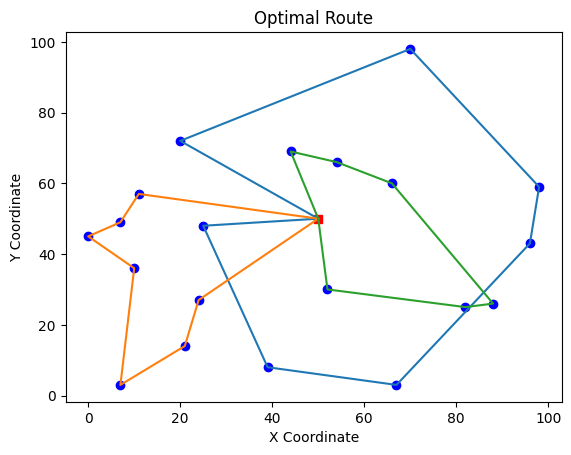

In [26]:
# Method to measure and report the diversity of solutions in the population over time

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


def measure_diversity(population):
    """Calculates a simple diversity metric based on the number of unique individuals in the population."""
    unique_individuals = len(set(tuple(ind) for ind in population))
    return unique_individuals / len(population)

def main():
    random.seed(42)
    num_generations = 300
    pop_size = 300

    # Store fitness values and diversity for plotting
    fitness_values = []
    diversity_values = []

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    for gen in range(num_generations):
        pop, _ = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 1, stats=stats, halloffame=hof, verbose=False)
        fitness_values.append(hof[0].fitness.values[0])
        diversity_values.append(measure_diversity(pop))

    # Plot fitness progression
    plt.figure()
    plt.plot(range(num_generations), fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.title("Fitness Progression")
    plt.show()

    # Plot diversity progression
    plt.figure()
    plt.plot(range(num_generations), diversity_values)
    plt.xlabel("Generation")
    plt.ylabel("Population Diversity")
    plt.title("Diversity Progression")
    plt.show()

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")

    return pop, stats, hof

if __name__ == "__main__":
    main()
